In [1]:
!pip install CBFV --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 9.0 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from CBFV import composition
from collections import OrderedDict


SEED =42
np.random.seed(SEED)

In [4]:
train_data= pd.read_csv("/content/cp_train.csv")
test_data = pd.read_csv("/content/cp_test.csv")
val_data= pd.read_csv("/content/cp_val.csv")

print(f"The shape of train data is :{train_data.shape}")
print(f"The shape of test_data is :{test_data.shape}")
print(f"the shape of val dat is :{val_data.shape}")

The shape of train data is :(3203, 3)
The shape of test_data is :(368, 3)
the shape of val dat is :(976, 3)


In [5]:
rename ={"cp":"target"}
df_train = train_data.rename(columns=rename)
df_test = test_data.rename(columns=rename)
df_val = val_data.rename(columns=rename)
df_train.columns

Index(['formula', 'T', 'Cp'], dtype='object')

In [6]:
#Import the package and the generate_features function
from CBFV.composition import generate_features

In [7]:
df_train_sampled = df_train.sample(n=2000, random_state=SEED)
df_val_sampled = df_val.sample(n=200, random_state=SEED)
df_test_sampled = df_test.sample(n=200, random_state=SEED)

In [8]:
print('DataFrame column names before renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)

rename_dict = {'Cp': 'target'}
df_train = df_train.rename(columns=rename_dict)
df_val = df_val.rename(columns=rename_dict)
df_test = df_test.rename(columns=rename_dict)

df_train_sampled = df_train_sampled.rename(columns=rename_dict)
df_val_sampled = df_val_sampled.rename(columns=rename_dict)
df_test_sampled = df_test_sampled.rename(columns=rename_dict)

print('\nDataFrame column names after renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)

DataFrame column names before renaming:
Index(['formula', 'T', 'Cp'], dtype='object')
Index(['formula', 'T', 'Cp'], dtype='object')
Index(['formula', 'T', 'Cp'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'T', 'target'], dtype='object')
Index(['formula', 'T', 'target'], dtype='object')
Index(['formula', 'T', 'target'], dtype='object')


In [9]:
X_train_unscaled, y_train, formulae_train, skipped_train = composition.generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = composition.generate_features(df_val, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = composition.generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Processing Input Data: 100%|██████████| 3203/3203 [00:00<00:00, 26857.38it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 3203/3203 [00:00<00:00, 10558.77it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 976/976 [00:00<00:00, 24509.00it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 976/976 [00:00<00:00, 11294.86it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 368/368 [00:00<00:00, 22479.41it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 368/368 [00:00<00:00, 7128.36it/s]


	Creating Pandas Objects...


In [10]:
X_train_unscaled.head()

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,T
0,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1400.0
1,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1300.0
2,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1200.0
3,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1100.0
4,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1000.0


##Normalising the data to increase the model learning rate


In [11]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

In [12]:
X_train

array([[-0.03296754, -0.03292278, -0.00952004, ...,  0.00435197,
         0.00940215,  0.01451242],
       [-0.03297001, -0.03292525, -0.00952075, ...,  0.00435229,
         0.00940285,  0.00778726],
       [-0.03297099, -0.03292623, -0.00952104, ...,  0.00435242,
         0.00940313,  0.00106103],
       ...,
       [-0.01915804, -0.01677745, -0.03797236, ...,  0.10156781,
         0.09390272, -0.0380472 ],
       [-0.01915621, -0.01677585, -0.03796874, ...,  0.10155814,
         0.09389378, -0.04046913],
       [-0.01915419, -0.01677408, -0.03796475, ...,  0.10154745,
         0.0938839 , -0.04298717]])

In [13]:
from time import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.dummy import DummyRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR


from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [14]:
def instaniate_model(model_name):
  model=model_name()
  return model
def model_fit(model , X_train,y_train):
  ti= time()
  model= instaniate_model(model)
  model.fit(X_train, y_train)
  fit_time= ti- time()
  return model, time
def evaluate_model(model ,X, y_act):
  y_pred = model.predict(X)
  r2 = r2_score(y_act, y_pred)
  mae= mean_absolute_error(y_act, y_pred)
  rmse_error=  mean_squared_error(y_act, y_pred, squared=False)
  return r2, mae, rmse_error
def fit_evaluate_model(model, model_name, X_train, y_train, X_val , y_act_val):
  model, fit_time=model_fit(model, X_train, y_train)
  r2_train, mae_train , rmse_train = model_fit(model, X_train,y_train)
  r2_val , mae_val, rmse_val = evaluate_model(model , X_val , y_act_val)
  result_dict= {
      "model_name": model_name,
      "model_name_pretty": type(model).__name__,
      "model_params": model.get_params(),
      "fit_time": fit_time,
      "r2_train":r2_train,
      "mae_train"  : mae_train,
      "rmse_train": rmse_train,
      "r2_val" : r2_val,
      "mae_val":mae_val,
      "rmse_val": rmse_val
  }
  return model, result_dict

def append_result(df,result_dict):
  df_result_append = df.append(result_dict, ignore_index=True)
  return df_result_append

def append_model_dict(dic, model_name, model):
  dic[model_name] = model
  return dic


In [31]:
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_act_val):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_act_val)
    acc = model.predict(X_test)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val,
        "acc":acc}

    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

In [30]:
df_classicals= pd.DataFrame(columns=["model_name",
                                "model_name_pretty",
                                "model_params",
                                "fit_time",
                                "r2_train",
                                "mae_train",
                                "rmse_train",
                                "r2_val",
                                "mae_val",
                                "rmse_val",
                                     "accuracy"])
df_classicals

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val,accuracy


In [27]:
# Build a dictionary of model names
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'knr': KNeighborsRegressor,
})

In [33]:
# Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_val)
    df_classics = append_result_df(df_classics, result_dict)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor


<ipython-input-31-9a0cb99864d1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)
<ipython-input-31-9a0cb99864d1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)
<ipython-input-31-9a0cb99864d1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model gbr: GradientBoostingRegressor


<ipython-input-31-9a0cb99864d1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model rfr: RandomForestRegressor


<ipython-input-31-9a0cb99864d1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model etr: ExtraTreesRegressor


<ipython-input-31-9a0cb99864d1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model svr: SVR


<ipython-input-31-9a0cb99864d1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)
<ipython-input-31-9a0cb99864d1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model lsvr: LinearSVR
Now fitting and evaluating model knr: KNeighborsRegressor
Finished fitting 9 models, total time: 104.52 s


<ipython-input-31-9a0cb99864d1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


In [34]:
df_classics = df_classics.sort_values('r2_val', ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val,acc
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000659,0.000000,47.325366,60.571377,-0.000387,57.003436,79.829069,NaN
1,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000766,0.000000,47.325366,60.571377,-0.000387,57.003436,79.829069,"[106.92645800811738, 106.92645800811738, 106.9..."
2,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",1.577560,0.797593,15.530889,27.250834,0.649618,25.565216,47.244117,NaN
3,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",1.485323,0.797593,15.530889,27.250834,0.649618,25.565216,47.244117,"[105.41683499651982, 105.18126148334497, 104.9..."
4,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.032959,0.808213,15.358982,26.526354,0.668663,23.074320,45.942224,"[108.60632546884462, 108.09344046362466, 107.5..."
5,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.047564,0.808620,15.358191,26.498189,0.669186,23.083979,45.905983,NaN
6,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.004782,0.993518,1.944848,4.876527,0.748403,24.635433,40.034045,"[110.3238, 110.3238, 110.3238, 110.3238, 106.8..."
7,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.004832,0.993518,1.944848,4.876527,0.748403,24.635433,40.034045,NaN
8,abr,AdaBoostRegressor,"{'base_estimator': 'deprecated', 'estimator': ...",8.256325,0.920934,14.258502,17.031885,0.806326,24.937412,35.124719,NaN
9,abr,AdaBoostRegressor,"{'base_estimator': 'deprecated', 'estimator': ...",7.635894,0.924097,13.983555,16.687692,0.822413,23.969367,33.634360,"[121.14878770949703, 118.2584091559374, 113.86..."


In [35]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')

    return plot

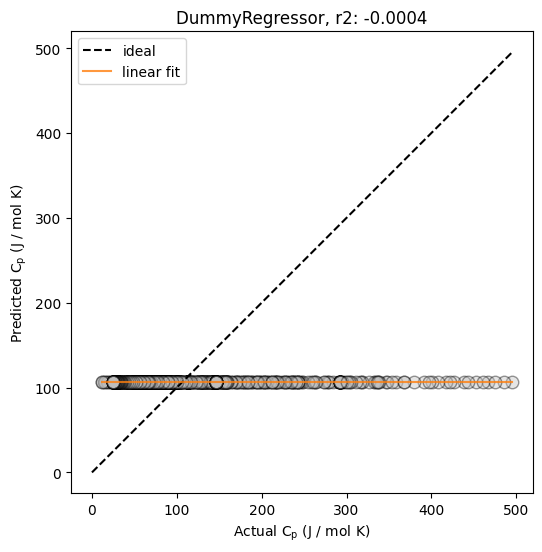

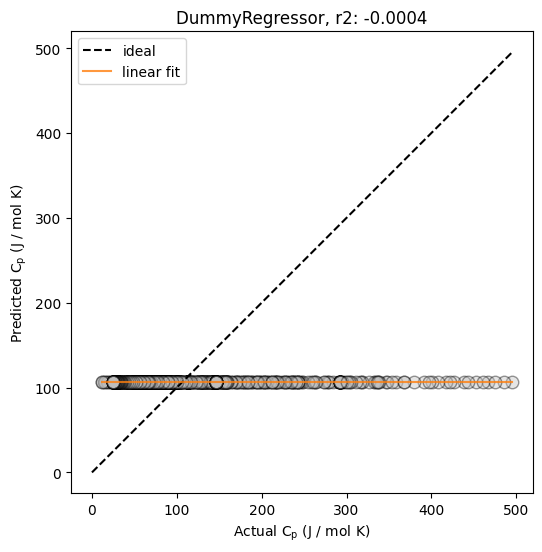

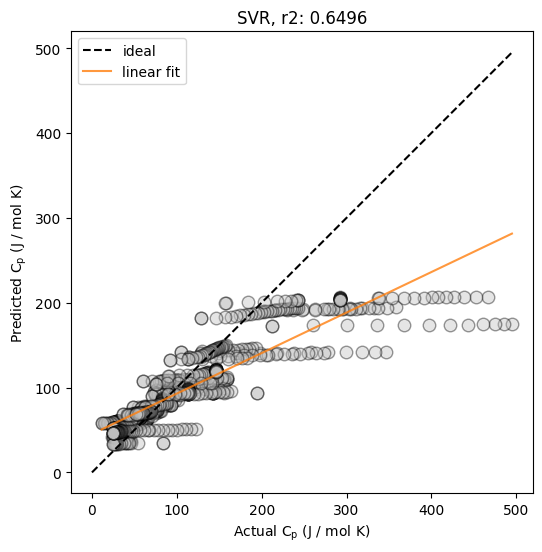

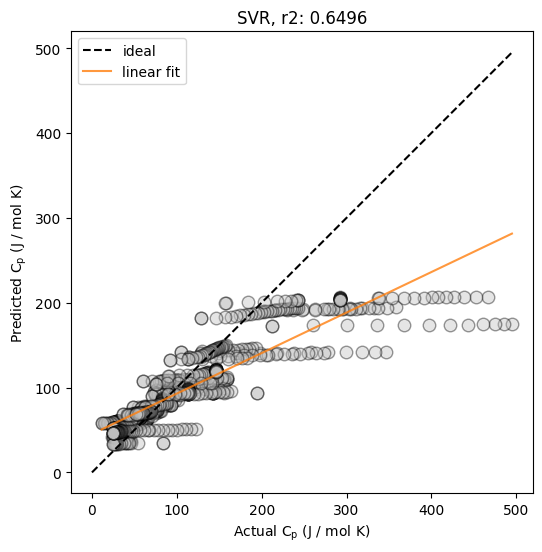

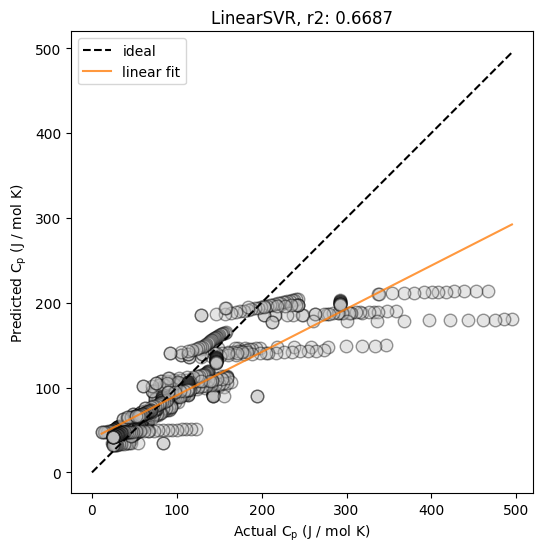

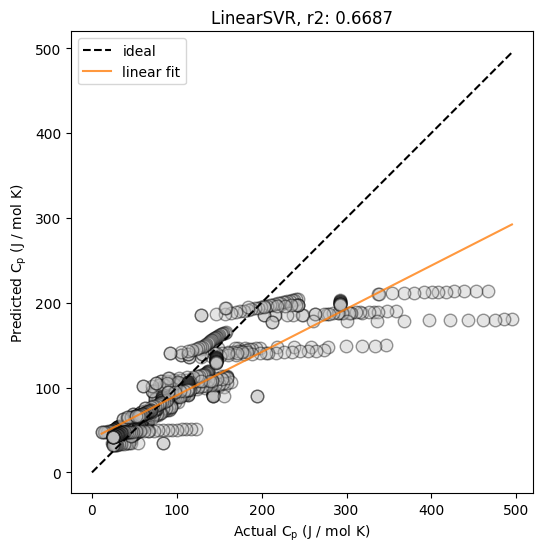

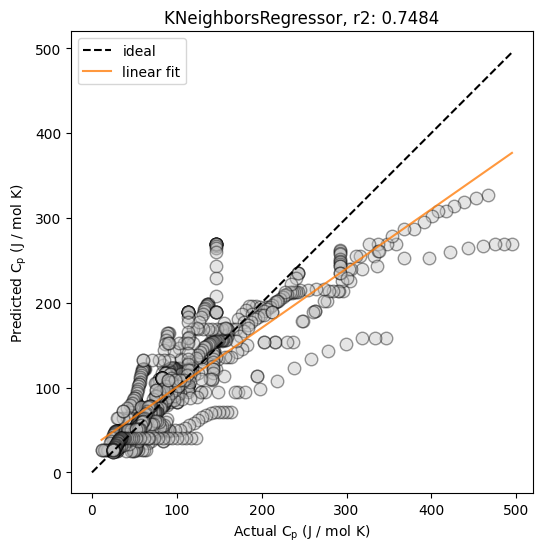

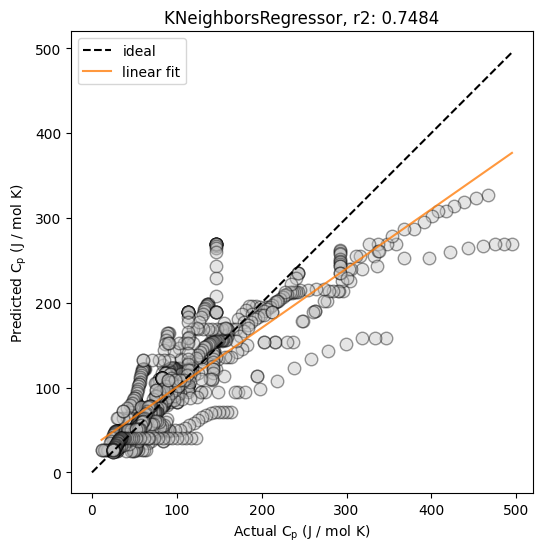

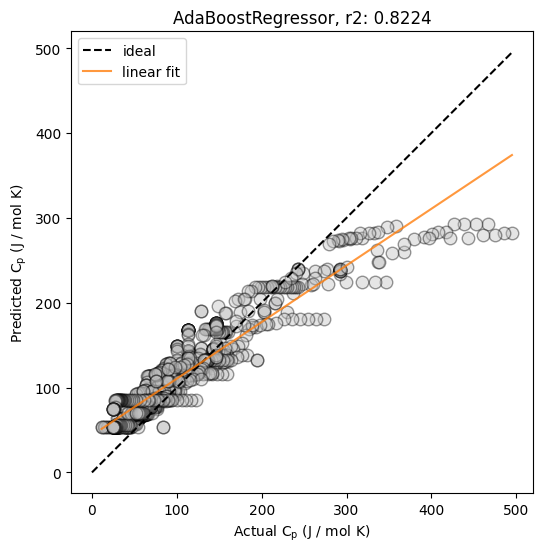

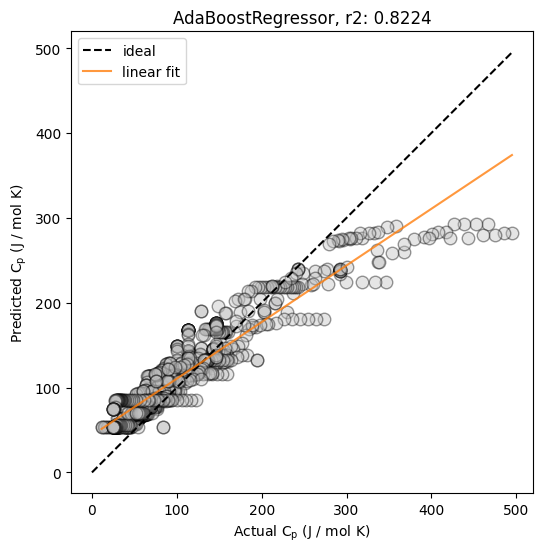

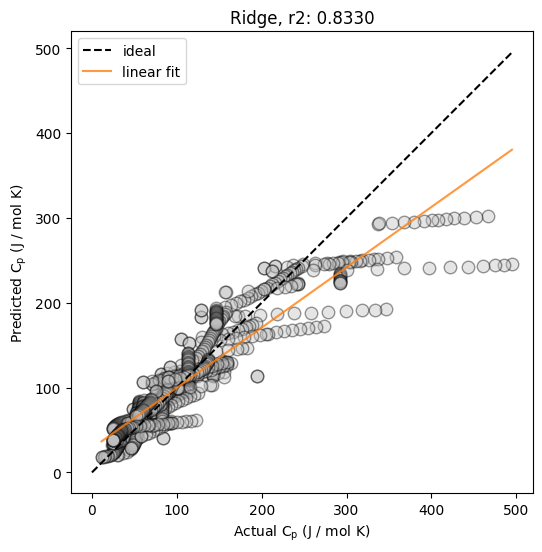

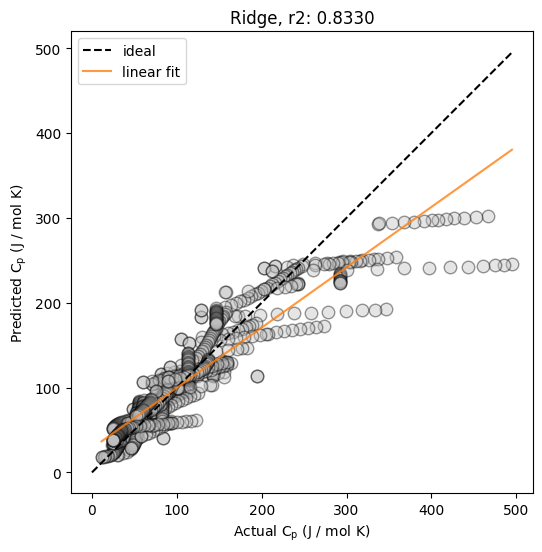

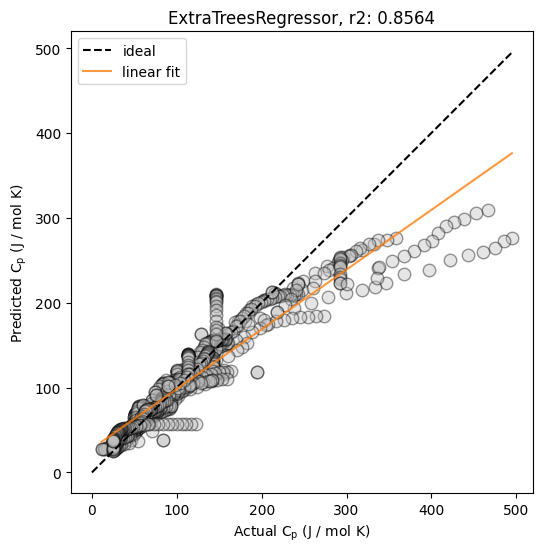

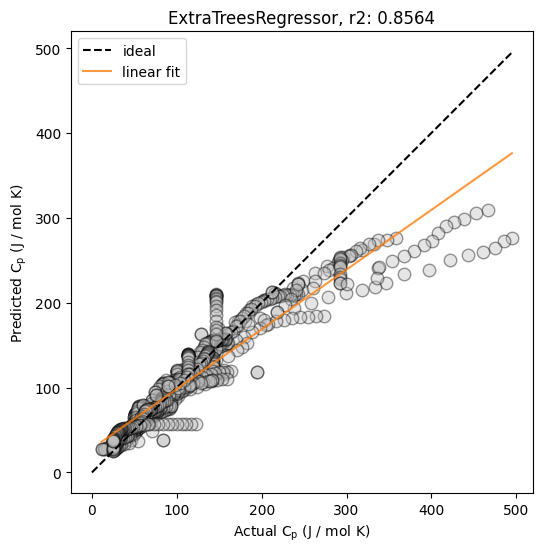

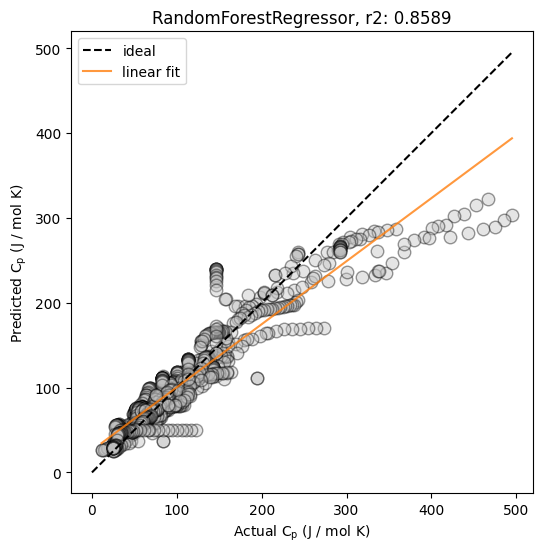

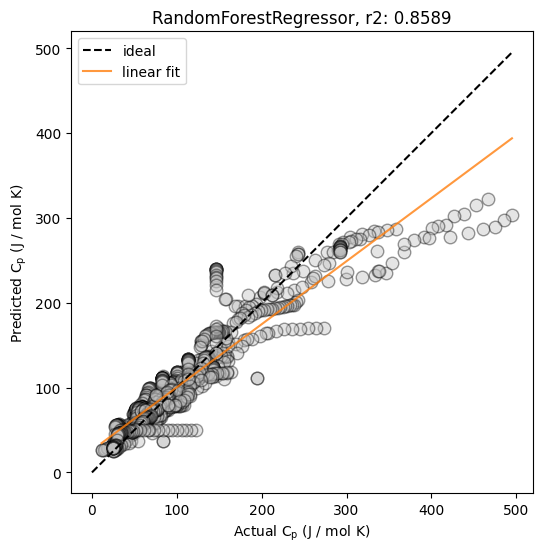

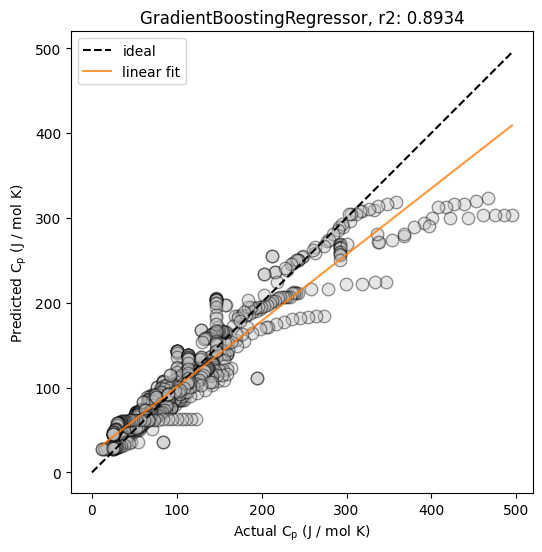

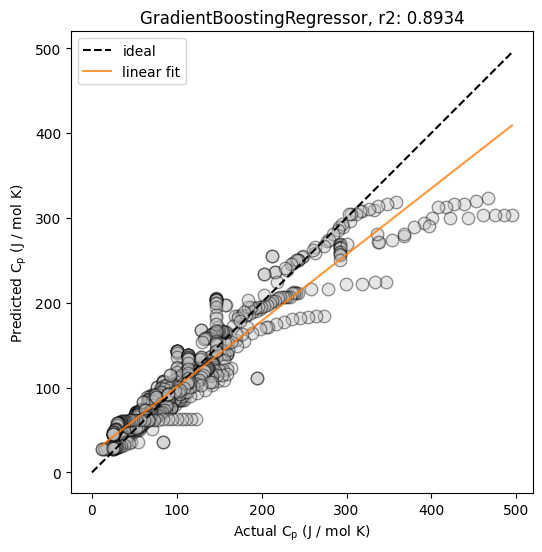

In [36]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    plot = plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')